In [ ]:
!unzip Zomatodataset.zip

Archive:  Zomatodataset.zip
  inflating: Country-Code.xlsx       
  inflating: file1.json              
  inflating: file2.json              
  inflating: file3.json              
  inflating: file4.json              
  inflating: file5.json              
  inflating: Untitled.ipynb          
  inflating: zomato.csv              


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
zdata = pd.read_csv("/content/zomato.csv", encoding="ISO-8859-1")

In [ ]:
zdata.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
zdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#Q1) Remove Outliers and Compare Dataset Sizes?

In [ ]:
zdata.shape

(9551, 21)

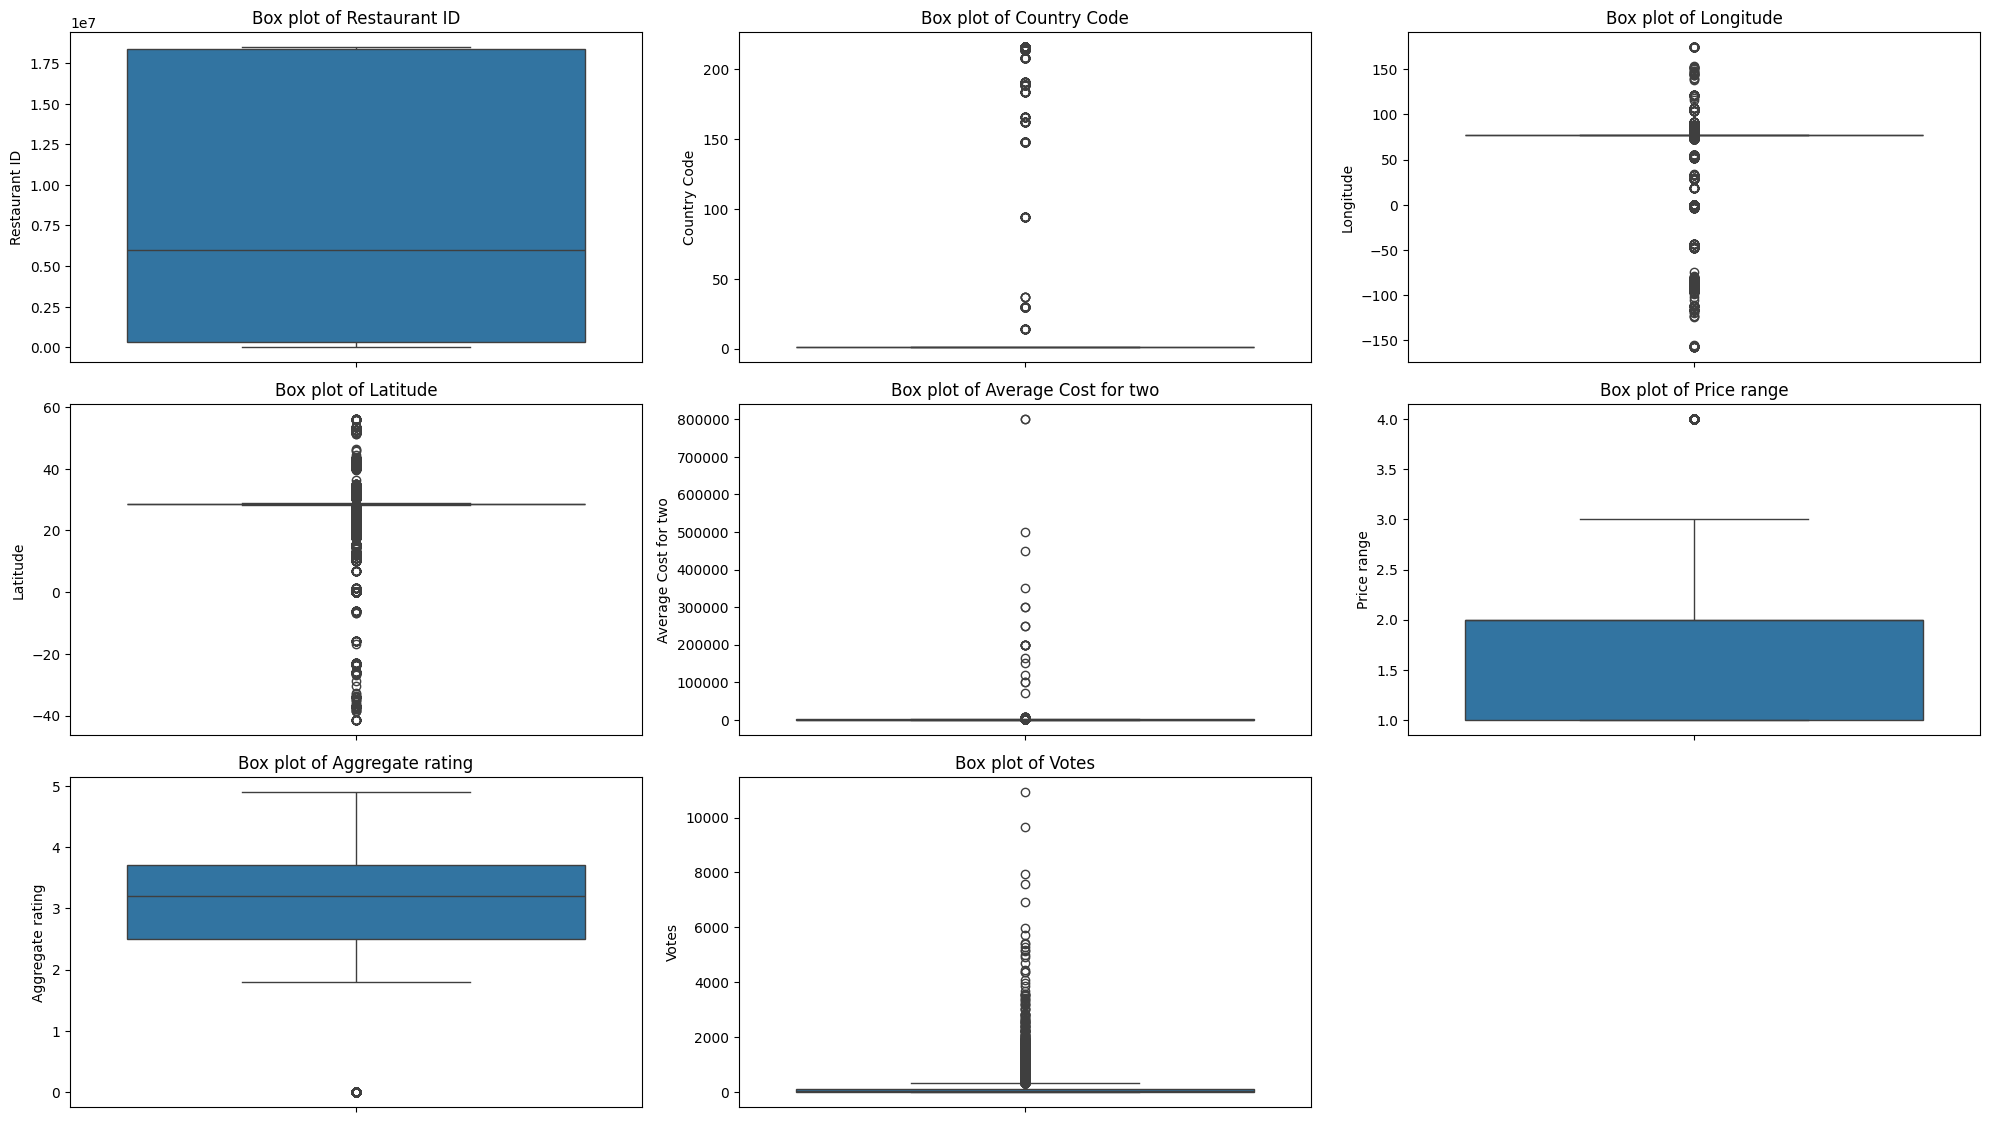

In [ ]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(zdata.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=zdata, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df,features):
    df_no_outliers = df.copy()
    for column in features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

In [ ]:
ft  = ['Average Cost for two','Price range','Votes']
routlier = remove_outliers(zdata,ft)
routlier.shape

(7765, 21)

In [ ]:
print("difference between data sizes after removing outliers is: ",zdata.shape[0]-routlier.shape[0]," rows")

difference between data sizes after removing outliers is:  1786  rows


#Q2) What is the main reason for analyzing the outliers?

Analyzing the outliers is needed to ensure that while training the model on some algorithm. the model does not learn for the noise in the dataset. It ensures that we can handle the dataset in a efficient manner.


#Q3) Find the all missing null values using two different methods in dataset ?

In [ ]:
missingvalues = routlier[routlier.isnull().any(axis=1)]
missingvalues

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.57720,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.58820,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.57510,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.53180,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.83641,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.51580,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.99581,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [ ]:
routlier.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                7
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
# cuisines has null values. to remove them

#method 1:

method1_handna = routlier.dropna(subset=['Cuisines'])
print(method1_handna.shape)
print(method1_handna.isnull().sum())

(7758, 21)
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
#method 2:
# Fill missing values with the most frequent value
most_frequent = routlier['Cuisines'].mode()[0]
routlier['Cuisines'].fillna(most_frequent,inplace=True)
routlier.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#Q4) Explore whether we can merge "zomato.csv" and "country_code.xlsx" if yes then show the whole file in the csv format?

In [ ]:
country = pd.read_excel('/content/Country-Code.xlsx')
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
routlier = pd.merge(routlier, country, on='Country Code', how='left')
routlier.shape

(7765, 22)

In [ ]:
# the column has been added the routlier dataframe earlier of shape (7765,21) is now (7765,22)
routlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765 entries, 0 to 7764
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7765 non-null   int64  
 1   Restaurant Name       7765 non-null   object 
 2   Country Code          7765 non-null   int64  
 3   City                  7765 non-null   object 
 4   Address               7765 non-null   object 
 5   Locality              7765 non-null   object 
 6   Locality Verbose      7765 non-null   object 
 7   Longitude             7765 non-null   float64
 8   Latitude              7765 non-null   float64
 9   Cuisines              7765 non-null   object 
 10  Average Cost for two  7765 non-null   int64  
 11  Currency              7765 non-null   object 
 12  Has Table booking     7765 non-null   object 
 13  Has Online delivery   7765 non-null   object 
 14  Is delivering now     7765 non-null   object 
 15  Switch to order menu 

In [ ]:
routlier.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,No,No,No,No,3,4.8,Dark Green,Excellent,294,Phillipines
2,6314605,Sodam Korean Restaurant,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",Little Baguio,"Little Baguio, San Juan City",121.038110,14.598890,Korean,...,No,No,No,No,3,4.3,Green,Very Good,223,Phillipines
3,18185059,Cafe Arabelle,162,Santa Rosa,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa","Nuvali, Don Jose, Santa Rosa, Santa Rosa",121.057040,14.237082,"Cafe, American, Italian, Filipino",...,No,No,No,No,3,3.6,Yellow,Good,29,Phillipines
4,18182702,Nonna's Pasta & Pizzeria,162,Santa Rosa,"Ground Floor, Building G, Solenad 3, Nuvali, D...","Solenad 3, Don Jose, Santa Rosa","Solenad 3, Don Jose, Santa Rosa, Santa Rosa",121.056587,14.237679,"Italian, Pizza",...,No,No,No,No,3,4.0,Green,Very Good,72,Phillipines


#Q5) Find top 3 countries which uses zomato and plot it using piechart?

In [ ]:
country_counts = routlier['Country'].value_counts()
country_counts = country_counts[:3]
country_counts

Country
India             7339
United States      237
United Kingdom      52
Name: count, dtype: int64

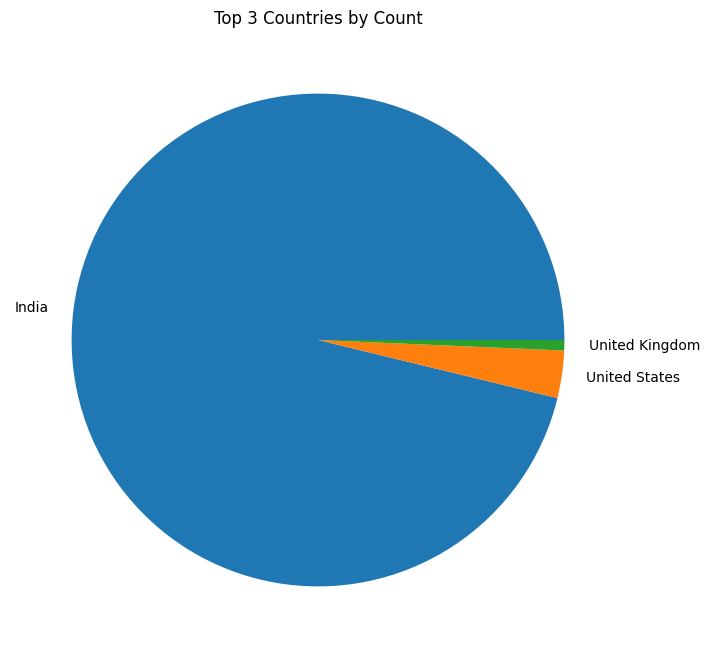

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index)
plt.title('Top 3 Countries by Count')
plt.show()

#Q6) Use features like Aggregate Rating, Rating color, Rating text and try to findout the count present for each rating of the restaurants.

In [ ]:
aggregate_rating_count = routlier['Aggregate rating'].value_counts()
aggregate_rating_count

Aggregate rating
0.0    2130
3.1     495
3.2     476
3.0     449
3.4     439
3.3     436
3.5     380
2.9     375
3.6     353
2.8     303
3.7     297
3.8     252
2.7     237
3.9     184
2.6     181
4.1     125
4.0     121
2.5     104
4.2      80
2.4      79
4.3      67
2.3      46
4.4      40
4.5      27
2.2      26
4.6      23
2.1      13
4.9       9
4.7       6
2.0       6
4.8       4
1.9       2
Name: count, dtype: int64

In [ ]:
rating_color_count = routlier['Rating color'].value_counts()
rating_color_count

Rating color
Orange        3495
White         2130
Yellow        1466
Green          433
Red            172
Dark Green      69
Name: count, dtype: int64

In [ ]:
rating_text_count = routlier['Rating text'].value_counts()
rating_text_count

Rating text
Average      3495
Not rated    2130
Good         1466
Very Good     433
Poor          172
Excellent      69
Name: count, dtype: int64